# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

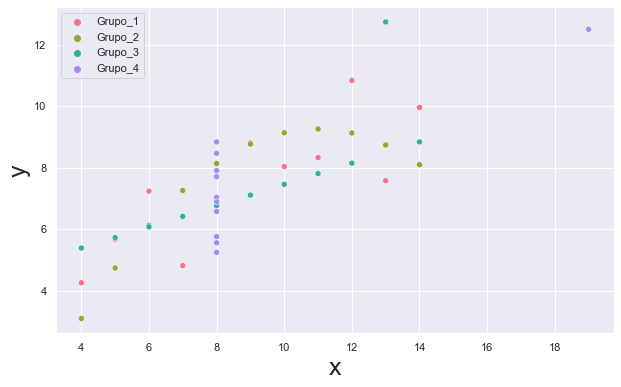

In [4]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

sns.scatterplot(
    x='x',
    y='y',
    hue='grupo',# color por label
    data=df,
    ci = None,
    palette='husl'
)   
plt.xlabel('x', size=25)
plt.ylabel('y',size=25)
plt.legend(loc='upper left')
plt.show()

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [13]:
df_estadisticas=df.groupby('grupo').describe() #se muestran las estadísticas de x e y en según el grupo
df_estadisticas

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

*Se puede ver que los 4 grupos poseen la misma estadística para las variables x e y, respectivamente.

3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

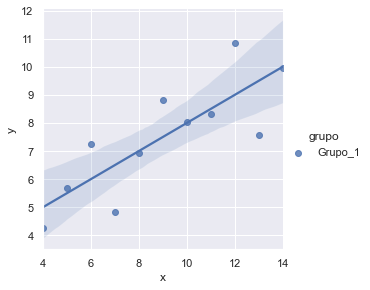

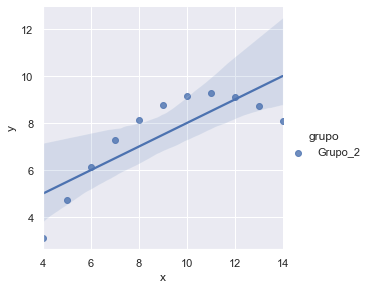

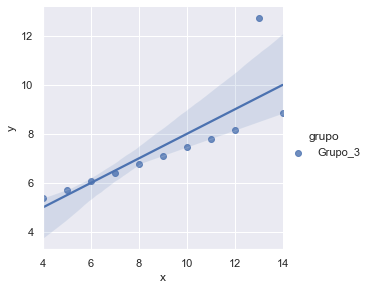

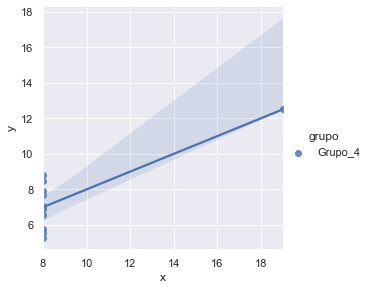

In [15]:
sns.lmplot(
    x='x',
    y='y',
    hue='grupo',
    data=df.groupby('grupo').get_group('Grupo_1'),
    height = 4,
)  
plt.show()
sns.lmplot(
    x='x',
    y='y',
    hue='grupo',
    data=df.groupby('grupo').get_group('Grupo_2'),
    height = 4,
)  
plt.show()
sns.lmplot(
    x='x',
    y='y',
    hue='grupo',
    data=df.groupby('grupo').get_group('Grupo_3'),
    height = 4,
)  
plt.show()
sns.lmplot(
    x='x',
    y='y',
    hue='grupo',
    data=df.groupby('grupo').get_group('Grupo_4'),
    height = 4,
)  
plt.show()

*Se puede observar que los 4 gráficos arrojan la misma regresión lineal, ya que comparten la misma estadística, pero a simple vista se nota que el único grupo que se comporta como ecuación lineal es el grupo 3. Esto indica que no basta con fijarnos en la estadística de los datos y que es de gran relevancia ver su comportamiento a través de un gráfico.

4. Calcule los resultados de las métricas para cada grupo. Interprete.

In [42]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [49]:
df_1=df.groupby('grupo').get_group('Grupo_1')
df_2=df.groupby('grupo').get_group('Grupo_2')
df_3=df.groupby('grupo').get_group('Grupo_3')
df_4=df.groupby('grupo').get_group('Grupo_4')

# Grupo 1

In [44]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_1[['x']] # we only take the first two features.
y = df_1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [45]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     9.834
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0202
Time:                        22:50:31   Log-Likelihood:                -12.443
No. Observations:                   8   AIC:                             28.89
Df Residuals:                       6   BIC:                             29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4668      1.357      2.555      0.0

C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [51]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)
summary_metrics(df_temp)
#A partir de este código se iban a visualizar las métricas, pero no se pudo :(  )

ModuleNotFoundError: No module named 'metrics_regression'

# Grupo 2

In [55]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_2[['x']] # we only take the first two features.
y = df_2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [56]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     26.13
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00220
Time:                        23:11:34   Log-Likelihood:                -10.838
No. Observations:                   8   AIC:                             25.68
Df Residuals:                       6   BIC:                             25.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9240      1.110      1.733      0.1

C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [57]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)
summary_metrics(df_temp)
#A partir de este código se iban a visualizar las métricas, pero no se pudo :(  )

ModuleNotFoundError: No module named 'metrics_regression'

# Grupo 3

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_3[['x']] # we only take the first two features.
y = df_3['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [65]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     14.71
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00860
Time:                        23:13:16   Log-Likelihood:                -12.655
No. Observations:                   8   AIC:                             29.31
Df Residuals:                       6   BIC:                             29.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4553      1.393      1.762      0.1

C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [66]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)
summary_metrics(df_temp)
#A partir de este código se iban a visualizar las métricas, pero no se pudo :(  )

ModuleNotFoundError: No module named 'metrics_regression'

# Grupo 4

In [61]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_4[['x']] # we only take the first two features.
y = df_4['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [62]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     12.85
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0116
Time:                        23:13:05   Log-Likelihood:                -13.199
No. Observations:                   8   AIC:                             30.40
Df Residuals:                       6   BIC:                             30.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8717      1.422      2.020      0.0

C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)
summary_metrics(df_temp)
#A partir de este código se iban a visualizar las métricas, pero no se pudo :(  )

ModuleNotFoundError: No module named 'metrics_regression'

A partir de lo que sí se pudo extraer, se puede ver que los R^2 de los grupos son [0.6, 0.8, 0.7, 0.68] aprox. A pesar de que los R^2 son similares, se ve que el grupo 1 y el 4 tienen los más bajos, lo que concuerda con lo observado del gráfico, es decir, que son los que peor aproximación tienen a la regresión lineal. Esto a diferencia del grupo 1 y 2, en los que podría verse, al menos sectores, de comportamiento lineal.

5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Para el grupo 3 y 4 eliminaría outliers
Para el grupo 2 , probablemente una regresión polinómica sería más acertada